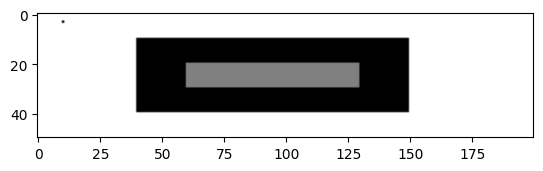

In [14]:
import numpy as np
import matplotlib.pyplot as plt

alto = 50
ancho = 200
mi_arreglo = np.zeros((alto, ancho))

mi_arreglo[3,10] = 1
mi_arreglo[10:40, 40:150] = 1
mi_arreglo[20:30, 60:130] = 0.5

plt.imshow(-mi_arreglo, cmap='gray')

plt.show()

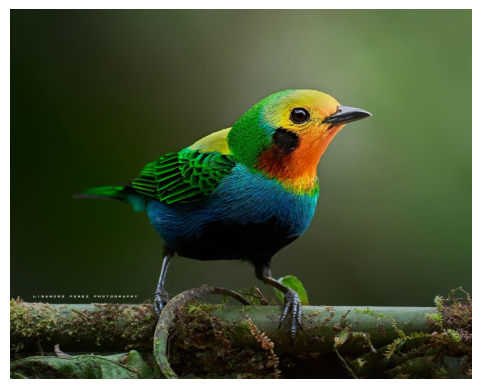

In [15]:
# prompt: Cargar una imagen en formato .jpeg con el nombre 'Tangara-multicolor-' y visualiza con matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming the image is uploaded to your Colab environment
image_path = 'Tangara-multicolor-.jpeg'  # Replace with the actual path to your image

try:
  img = mpimg.imread(image_path)
  plt.imshow(img)
  plt.axis('off')  # Turn off axis labels
  plt.show()
except FileNotFoundError:
  print(f"Error: Image file not found at '{image_path}'. Please upload the image first.")


In [16]:
type(img)

numpy.ndarray

In [18]:
img.shape

(1024, 1280, 3)

In [19]:
img[175,250]

array([34, 42, 19], dtype=uint8)

In [21]:
img.max()

255

In [22]:
img.min()

0

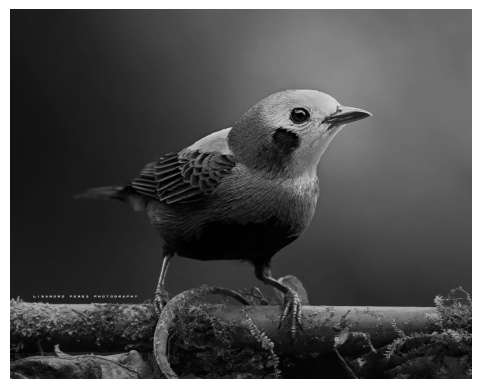

In [31]:
# prompt: Convertir la imagen a escalas de grises empleando Open CV

import cv2

# Assuming the image is uploaded to your Colab environment
image_path = 'Tangara-multicolor-.jpeg'  # Replace with the actual path to your image

try:
  img = cv2.imread(image_path)
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Display the grayscale image using matplotlib
  plt.imshow(gray_img, cmap='gray')
  plt.axis('off')  # Turn off axis labels
  plt.show()

except FileNotFoundError:
  print(f"Error: Image file not found at '{image_path}'. Please upload the image first.")

In [32]:
gray_img.shape

(1024, 1280)

Empleando Keras

In [47]:
import keras

from keras.layers import Input, Dense, Conv2D,MaxPooling2D, UpSampling2D, Flatten
from re import I
from keras.models import Model

h,w = gray_img.shape

input_img = Input(shape=(h, w, 1))

x = Conv2D(1, (1, 1), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

modelo1 = Model(input_img, x)

modelo1.summary()

modelo1.set_weights([np.array([[[[100.0]]]], dtype=np.float32),np.array([-50.0], dtype=np.float32)])

gray_img_reshaped = gray_img.reshape((1, *gray_img.shape, 1))
gray_img_reshaped.shape

imgs = modelo1.predict(gray_img_reshaped)
imgs.shape

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 1024, 1280, 1)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 1024, 1280, 1)       │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 512, 640, 1)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


(1, 512, 640, 1)

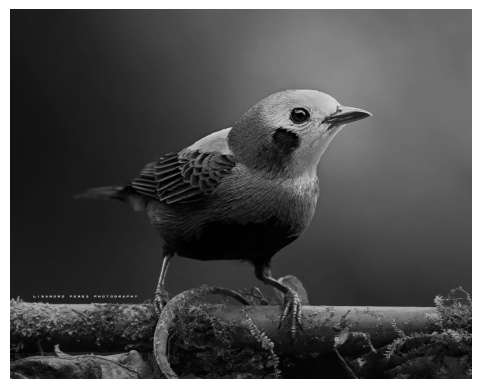

In [48]:
# prompt: Emplea reshape con imgs para convertir a (1024, 1280)  e imprime la imagen con Matplotlib

# Assuming you have 'gray_img' from your previous code

try:
  # Reshape the image to (1024, 1280)
  # Note: This will likely distort the image if its original dimensions are different.
  resized_img = cv2.resize(gray_img, (1280, 1024))

  # Display the resized image using matplotlib
  plt.imshow(resized_img, cmap='gray')
  plt.axis('off')  # Turn off axis labels
  plt.show()

except Exception as e:
  print(f"Error resizing the image: {e}")

In [23]:
def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida


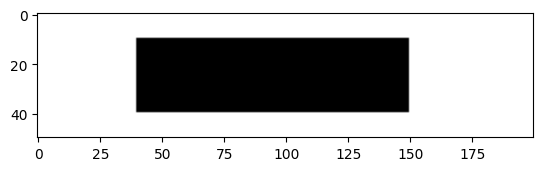

arreglo 2 2 2 (2, 2, 1, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


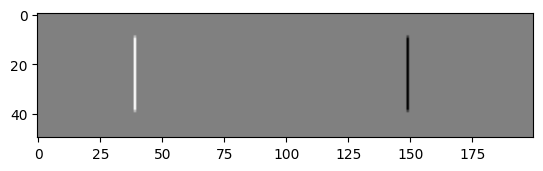

gola


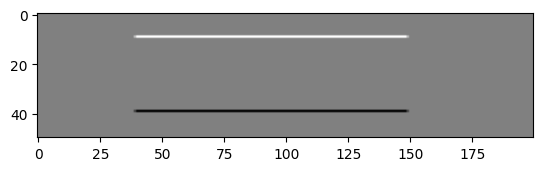

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D,MaxPooling2D, UpSampling2D, Flatten
from re import I
from keras.models import Model

alto = 50
ancho = 200
img = np.zeros((alto, ancho))

img[10:40, 40:150] = 1
#mi_arreglo[20:30, 60:130] = 0.5

plt.imshow(-img, cmap='gray')
plt.show()

h,w = img.shape

input_img = Input(shape=(h, w, 1))

x = Conv2D(2, (2, 2), activation='linear', padding='same')(input_img)
modelo3 = Model(input_img, x)

filtro1 = [[1, -1],
           [1, -1]]

filtro2 = [[1, 1],
           [-1, -1]]

filtro = reformar_filtros([filtro1, filtro2])

modelo3.set_weights([filtro, np.array([0, 0], dtype=np.float32)])

img_tmp = modelo3.predict(img.reshape((1, *img.shape, 1)))
img_tmp.shape

imgsA = np.reshape(img_tmp[0,:,:,0], (50, 200, ))
imgsB = np.reshape(img_tmp[0,:,:,1], (50, 200, ))

plt.imshow(-imgsA, cmap='gray')
plt.show()
plt.imshow(-imgsB, cmap='gray')
plt.show()


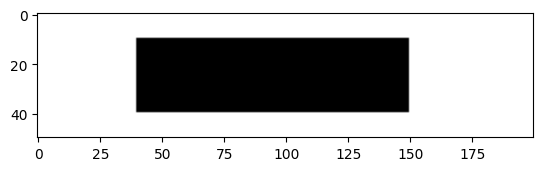

arreglo 3 3 3 (3, 3, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


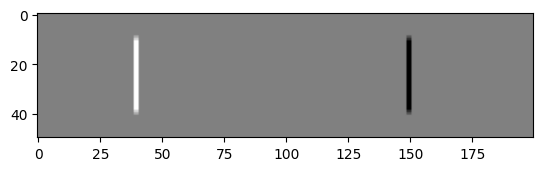

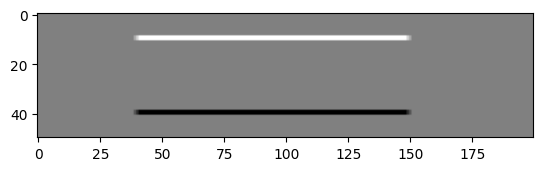

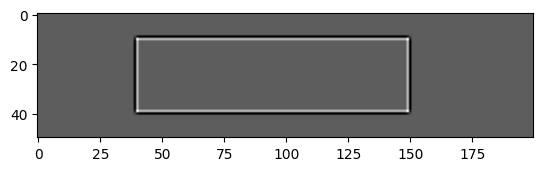

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D,MaxPooling2D, UpSampling2D, Flatten
from re import I
from keras.models import Model

alto = 50
ancho = 200
img = np.zeros((alto, ancho))

img[10:40, 40:150] = 1
#mi_arreglo[20:30, 60:130] = 0.5

plt.imshow(-img, cmap='gray')
plt.show()

h,w = img.shape

input_img = Input(shape=(h, w, 1))

x = Conv2D(3, (3, 3), activation='linear', padding='same')(input_img)
modelo3 = Model(input_img, x)

filtro1 = [[1, 0, -1],
           [1, 0, -1],
           [1, 0, -1]]

filtro2 = [[1, 1, 1],
           [0, 0, 0],
           [-1, -1, -1]]

filtro3 = [[1, 2, 1],
           [2, -12, 2],
           [1, 2, 1]]

filtro = reformar_filtros([filtro1, filtro2, filtro3])

modelo3.set_weights([filtro, np.array([0, 0, 0], dtype=np.float32)])

img_tmp = modelo3.predict(img.reshape((1, *img.shape, 1)))
img_tmp.shape

imgsA = np.reshape(img_tmp[0,:,:,0], (50, 200, ))
imgsB = np.reshape(img_tmp[0,:,:,1], (50, 200, ))
imgsC = np.reshape(img_tmp[0,:,:,2], (50, 200, ))

plt.imshow(-imgsA, cmap='gray')
plt.show()
plt.imshow(-imgsB, cmap='gray')
plt.show()
plt.imshow(-imgsC, cmap='gray')
plt.show()